In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

In [20]:
def loadDataSet(fileName):
    """
    加载数据
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []
    yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr


def standRegres(xArr, yArr):
    """
    计算回归系数w
    """
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat  #根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws


def plotDataSet():
    """
    绘制数据集
    """
    xArr, yArr = loadDataSet('ex0.txt')  #加载数据集
    n = len(xArr)  #数据个数
    xcord = []
    ycord = []  #样本点
    for i in range(n):
        xcord.append(xArr[i][1])
        ycord.append(yArr[i])  #样本点
    fig = plt.figure()
    ax = fig.add_subplot(111)  #添加subplot
    ax.scatter(xcord, ycord, s=20, c='blue', alpha=.5)  #绘制样本点
    plt.title('DataSet')  #绘制title
    plt.xlabel('X')
    plt.show()


def plotRegression():
    """
    绘制回归曲线和数据点
    """
    xArr, yArr = loadDataSet('ex0.txt')  #加载数据集
    ws = standRegres(xArr, yArr)  #计算回归系数
    xMat = np.mat(xArr)  #创建xMat矩阵
    yMat = np.mat(yArr)  #创建yMat矩阵
    xCopy = xMat.copy()  #深拷贝xMat矩阵
    xCopy.sort(0)  #排序
    yHat = xCopy * ws  #计算对应的y值
    fig = plt.figure()
    ax = fig.add_subplot(111)  #添加subplot
    ax.plot(xCopy[:, 1], yHat, c='red')  #绘制回归曲线
    ax.scatter(xMat[:, 1].flatten().A[0],
               yMat.flatten().A[0],
               s=20,
               c='blue',
               alpha=.5)  #绘制样本点
    plt.title('DataSet')  #绘制title
    plt.xlabel('X')
    plt.show()


def plotlwlrRegression():
    """
    绘制多条局部加权回归曲线
    """
    xArr, yArr = loadDataSet('ex0.txt')  #加载数据集
    yHat_1 = lwlrTest(xArr, xArr, yArr, 1.0)  #根据局部加权线性回归计算yHat
    yHat_2 = lwlrTest(xArr, xArr, yArr, 0.01)  #根据局部加权线性回归计算yHat
    yHat_3 = lwlrTest(xArr, xArr, yArr, 0.003)  #根据局部加权线性回归计算yHat
    xMat = np.mat(xArr)  #创建xMat矩阵
    yMat = np.mat(yArr)  #创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)  #排序，返回索引值
    xSort = xMat[srtInd][:, 0, :]
    fig, axs = plt.subplots(nrows=3,
                            ncols=1,
                            sharex=False,
                            sharey=False,
                            figsize=(10, 8))

    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c='red')  #绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c='red')  #绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c='red')  #绘制回归曲线
    axs[0].scatter(xMat[:, 1].flatten().A[0],
                   yMat.flatten().A[0],
                   s=20,
                   c='blue',
                   alpha=.5)  #绘制样本点
    axs[1].scatter(xMat[:, 1].flatten().A[0],
                   yMat.flatten().A[0],
                   s=20,
                   c='blue',
                   alpha=.5)  #绘制样本点
    axs[2].scatter(xMat[:, 1].flatten().A[0],
                   yMat.flatten().A[0],
                   s=20,
                   c='blue',
                   alpha=.5)  #绘制样本点

    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'局部加权回归曲线,k=1.0')
    axs1_title_text = axs[1].set_title(u'局部加权回归曲线,k=0.01')
    axs2_title_text = axs[2].set_title(u'局部加权回归曲线,k=0.003')

    plt.setp(axs0_title_text, size=16, weight='bold', color='k')
    plt.setp(axs1_title_text, size=16, weight='bold', color='k')
    plt.setp(axs2_title_text, size=16, weight='bold', color='k')

    plt.xlabel('X')
    plt.tight_layout()
    plt.show()


def lwlr(testPoint, xArr, yArr, k=1.0):
    """
    使用局部加权线性回归计算回归系数w
    """
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))  #创建权重对角矩阵
    for j in range(m):  #遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = np.exp(diffMat * diffMat.T / (-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))  #计算回归系数
    return testPoint * ws


def lwlrTest(testArr, xArr, yArr, k=1.0):
    """
    函数说明:局部加权线性回归测试
    """
    m = np.shape(testArr)[0]  #计算测试数据集大小
    yHat = np.zeros(m)
    for i in range(m):  #对每个样本点进行预测
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

C:\Users\12716\AppData\Local\Temp\ipykernel_54988\993359041.py:137: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diffMat * diffMat.T / (-2.0 * k**2))
C:\Users\12716\AppData\Local\Temp\ipykernel_54988\993359041.py:153: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yHat[i] = lwlr(testArr[i], xArr, yArr, k)


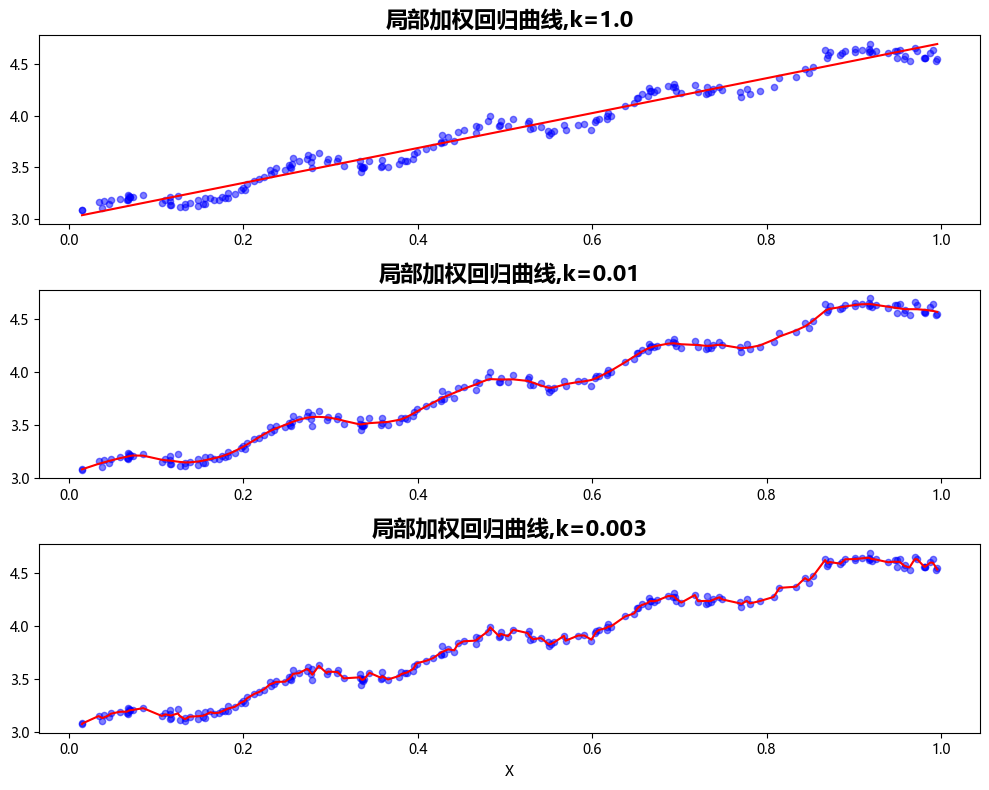

In [21]:
plotlwlrRegression()

In [23]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np

def Gradient_Ascent_test():
    """
    梯度上升测试
    """

    def f_prime(x_old):  #f(x)的导数
        return -2 * x_old + 4

    x_old = -1  #初始值，给一个小于x_new的值
    x_new = 0  #梯度上升算法初始值，即从(0,0)开始
    alpha = 0.01  #步长，也就是学习速率，控制更新的幅度
    presision = 0.00000001  #精度，也就是更新阈值
    while abs(x_new - x_old) > presision:
        x_old = x_new
        x_new = x_old + alpha * f_prime(x_old)  #上面提到的公式
    print(x_new)  #打印最终求解的极值近似值


def loadDataSet():
    """
    加载数据
    """
    dataMat = []  #创建数据列表
    labelMat = []  #创建标签列表
    fr = open('testSet.txt')  #打开文件
    for line in fr.readlines():  #逐行读取
        lineArr = line.strip().split()  #去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])  #添加数据
        labelMat.append(int(lineArr[2]))  #添加标签
    fr.close()  #关闭文件
    return dataMat, labelMat  #返回


def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))


def gradAscent(dataMatIn, classLabels):
    """
    梯度上升算法
    """
    dataMatrix = np.mat(dataMatIn)  #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()  #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)  #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001  #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500  #最大迭代次数
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)  #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()  #将矩阵转换为数组，返回权重数组


def plotDataSet():
    dataMat, labelMat = loadDataSet()  #加载数据集
    dataArr = np.array(dataMat)  #转换成numpy的array数组
    n = np.shape(dataMat)[0]  #数据个数
    xcord1 = []
    ycord1 = []  #正样本
    xcord2 = []
    ycord2 = []  #负样本
    for i in range(n):  #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])  #1为正样本
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])  #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)  #添加subplot
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=.5)  #绘制正样本
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=.5)  #绘制负样本
    plt.title('DataSet')  #绘制title
    plt.xlabel('X1')
    plt.ylabel('X2')  #绘制label
    plt.show()  #显示


def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()  #加载数据集
    dataArr = np.array(dataMat)  #转换成numpy的array数组
    n = np.shape(dataMat)[0]  #数据个数
    xcord1 = []
    ycord1 = []  #正样本
    xcord2 = []
    ycord2 = []  #负样本
    for i in range(n):  #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])  #1为正样本
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])  #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)  #添加subplot
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=.5)  #绘制正样本
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=.5)  #绘制负样本
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.title('BestFit')  #绘制title
    plt.xlabel('X1')
    plt.ylabel('X2')  #绘制label
    plt.show()    

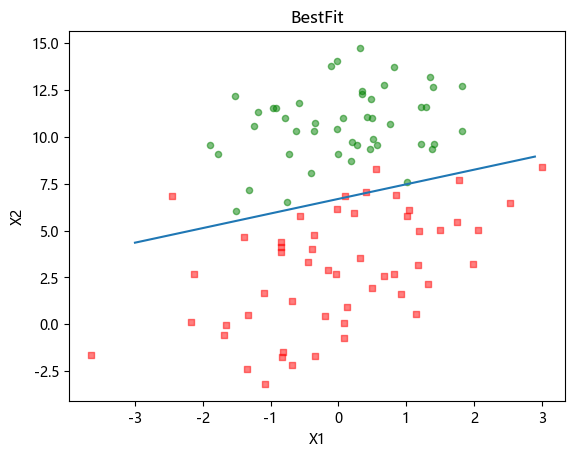

In [24]:
dataMat, labelMat = loadDataSet()
weights = gradAscent(dataMat, labelMat)
plotBestFit(weights)